In [1]:
import pandas  as pd
import numpy  as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\User\Desktop\monthly-beer-production.csv',index_col = 'Month', parse_dates = True)
df.index.freq='MS'

In [3]:
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


<Axes: xlabel='Month'>

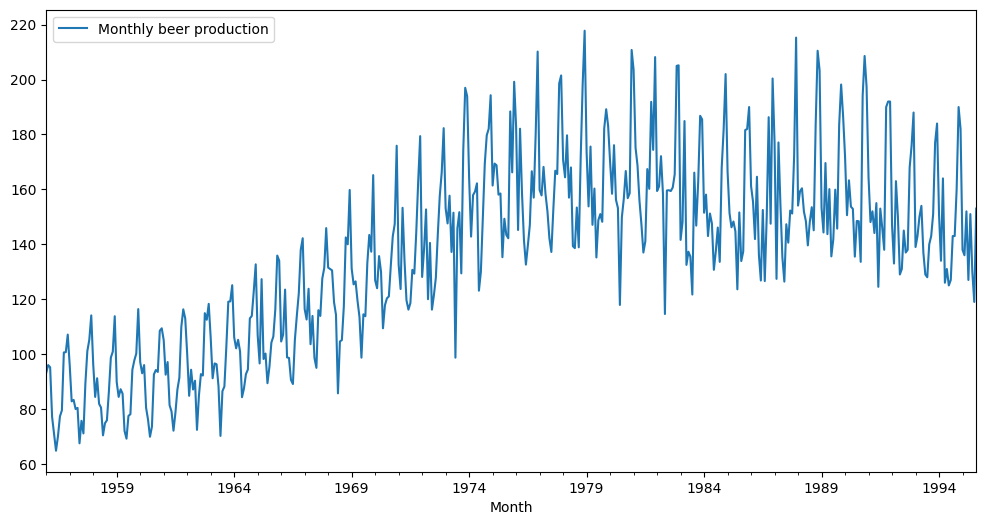

In [4]:
df.plot(figsize=(12,6))

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

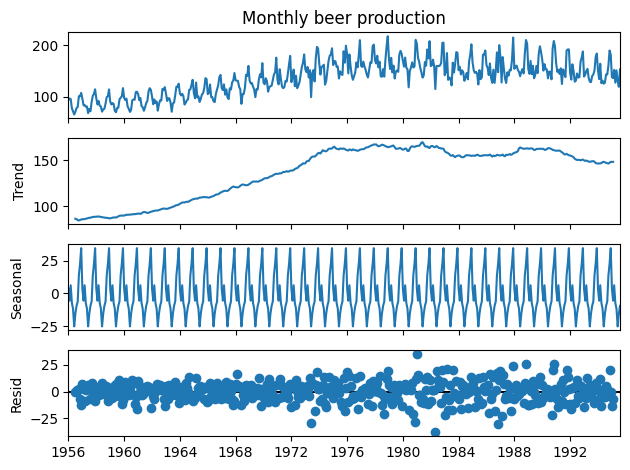

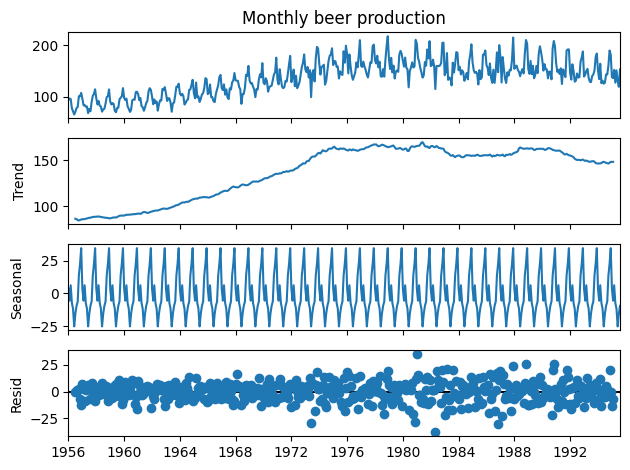

In [7]:
results = seasonal_decompose(df['Monthly beer production'])
results.plot()

In [8]:
len(df)

476

In [9]:
train = df.iloc[:464]
test = df.iloc[464:]

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
df.head(),df.tail()

(            Monthly beer production
 Month                              
 1956-01-01                     93.2
 1956-02-01                     96.0
 1956-03-01                     95.2
 1956-04-01                     77.1
 1956-05-01                     70.9,
             Monthly beer production
 Month                              
 1995-04-01                    127.0
 1995-05-01                    151.0
 1995-06-01                    130.0
 1995-07-01                    119.0
 1995-08-01                    153.0)

In [12]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)


In [15]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [16]:
#define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [17]:
x,y = generator[0]
print(f'Given the Array :\n{x.flatten()}')
print(f'Predict this Y:\n{y}')

Given the Array :
[0.18562092 0.20392157 0.19869281]
Predict this Y:
[[0.08039216]]


In [18]:
x.shape

(1, 3, 1)

In [19]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [21]:
#define  model
model= Sequential()
model.add(LSTM(100,activation='relu', input_shape = (n_input ,  n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(generator,epochs = 100)

Epoch 1/100


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0539
Epoch 2/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0173
Epoch 3/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0143
Epoch 4/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0099
Epoch 5/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0071
Epoch 6/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0082
Epoch 7/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0079
Epoch 8/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0070
Epoch 9/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0067
Epoch 10/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0088
Epoch 11/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0069
Epoch 12/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0063
Epoch 13/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0082
Epoch 14/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0073
Epoch 15/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step -

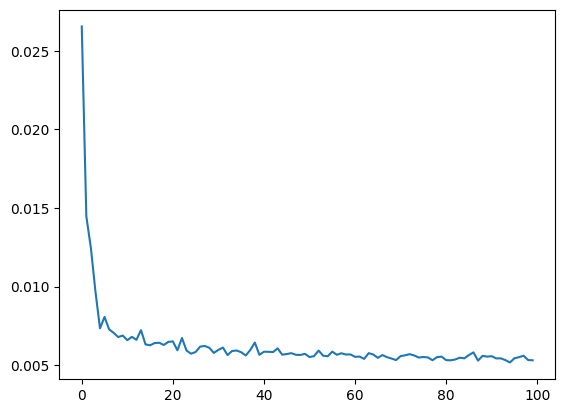

In [24]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [25]:
last_train_batch = scaled_train[-n_input:]

In [26]:
last_train_batch = last_train_batch.reshape((1,n_input,n_features))

In [27]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


array([[0.48843354]], dtype=float32)

In [28]:
scaled_test[0]

array([0.51111111])

In [29]:
test_predictions = []
first_eval_batch =scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [30]:
test_predictions

[array([0.48843354], dtype=float32),
 array([0.56507766], dtype=float32),
 array([0.69018567], dtype=float32),
 array([0.7062051], dtype=float32),
 array([0.5210469], dtype=float32),
 array([0.48929432], dtype=float32),
 array([0.57015634], dtype=float32),
 array([0.4155165], dtype=float32),
 array([0.4212395], dtype=float32),
 array([0.39995039], dtype=float32),
 array([0.42006385], dtype=float32),
 array([0.4685017], dtype=float32)]

In [31]:
true_predictions =scaler.inverse_transform(test_predictions)

In [32]:
test['predictions']=true_predictions

C:\Users\User\AppData\Local\Temp\ipykernel_18820\2081619921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions']=true_predictions


<Axes: xlabel='Month'>

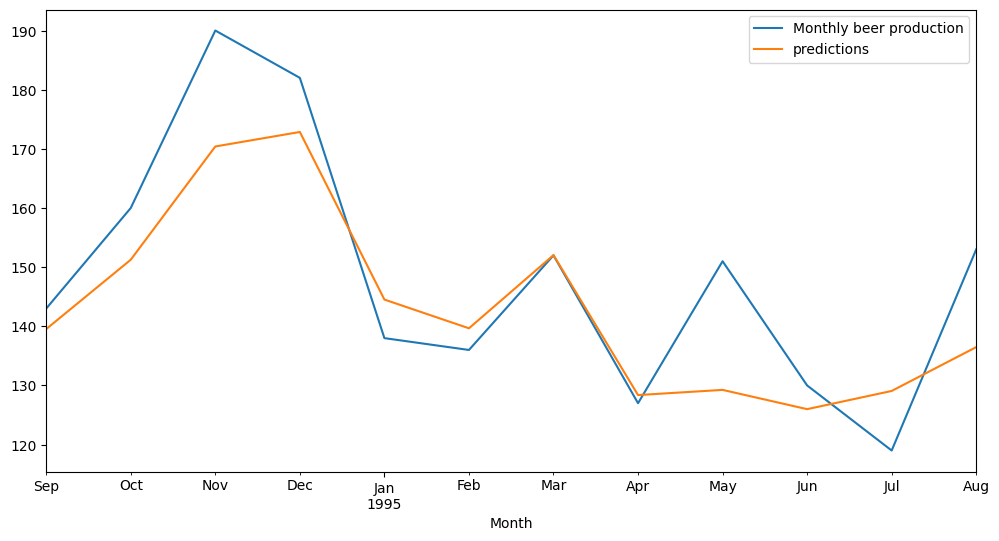

In [33]:
test.plot(figsize=(12,6))

In [37]:
future_predictions = []
future_steps = 36  

# Start with the last known batch
current_batch = scaled_train[-n_input:].reshape((1, n_input, n_features))

for i in range(future_steps):
    # Predict the next value
    current_pred = model.predict(current_batch)[0]
    future_predictions.append(current_pred)

    # Update the batch 
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

# Convert predictions back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

C:\Users\User\AppData\Local\Temp\ipykernel_18820\1302364203.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='M')[1:]


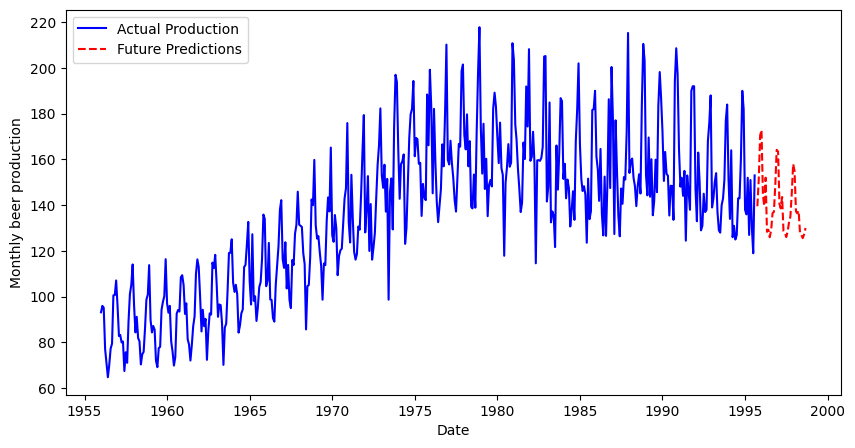

In [38]:

# Create future dates
last_date = df.index[-1] 
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='M')[1:]

# Plot 
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Monthly beer production'], label="Actual Production", color="blue")
plt.plot(future_dates, future_predictions, label="Future Predictions", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Monthly beer production")
plt.legend()
plt.show()


In [39]:
future_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted Production": future_predictions.flatten()
})

In [40]:
print(future_df)

         Date  Predicted Production
0  1995-09-30            139.530334
1  1995-10-31            151.256882
2  1995-11-30            170.398407
3  1995-12-31            172.849380
4  1996-01-31            144.520172
5  1996-02-29            139.662033
6  1996-03-31            152.033920
7  1996-04-30            128.374023
8  1996-05-31            129.249634
9  1996-06-30            125.992409
10 1996-07-31            129.069763
11 1996-08-31            136.480759
12 1996-09-30            137.061325
13 1996-10-31            148.938248
14 1996-11-30            164.203125
15 1996-12-31            163.456909
16 1997-01-31            140.542236
17 1997-02-28            138.597061
18 1997-03-31            143.589691
19 1997-04-30            128.607300
20 1997-05-31            127.953621
21 1997-06-30            126.059906
22 1997-07-31            128.496048
23 1997-08-31            132.584885
24 1997-09-30            135.072632
25 1997-10-31            145.555573
26 1997-11-30            158